In [1]:
#download java_profiles

!echo "export JAVA_HOME=$(/usr/libexec/java_home)" >> ~/.bash_profile
!source ~/.bash_profile
!javac

/Users/marina/.bash_profile:17: permission denied: /Users/marina
/Users/marina/.bash_profile:52: permission denied: /Users/marina
/Users/marina/.bash_profile:53: permission denied: /Users/marina
Usage: javac <options> <source files>
where possible options include:
  @<filename>                  Read options and filenames from file
  -Akey[=value]                Options to pass to annotation processors
  --add-modules <module>(,<module>)*
        Root modules to resolve in addition to the initial modules, or all modules
        on the module path if <module> is ALL-MODULE-PATH.
  --boot-class-path <path>, -bootclasspath <path>
        Override location of bootstrap class files
  --class-path <path>, -classpath <path>, -cp <path>
        Specify where to find user class files and annotation processors
  -d <directory>               Specify where to place generated class files
  -deprecation
        Output source locations where deprecated APIs are used
  --enable-preview
        Enable p

In [2]:
#download mallet package for LDA 

!~/mallet-2.0.8/bin/mallet import-file
!pip install little_mallet_wrapper
!pip install seaborn
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

A tool for creating instance lists of feature vectors from comma-separated-values
--help TRUE|FALSE
  Print this command line option usage information.  Give argument of TRUE for longer documentation
  Default is false
--prefix-code 'JAVA CODE'
  Java code you want run before any other interpreted code.  Note that the text is interpreted without modification, so unlike some other Java code options, you need to include any necessary 'new's when creating objects.
  Default is null
--config FILE
  Read command option values from a file
  Default is null
--input FILE
  The file containing data to be classified, one instance per line
  Default is null
--output FILE
  Write the instance list to this file; Using - indicates stdout.
  Default is text.vectors
--line-regex REGEX
  Regular expression containing regex-groups for label, name and data.
  Default is ^(\S*)[\s,]*(\S*)[\s,]*(.*)$
--label INTEGER
  The index of the group containing the label string.
   Use 0 to indicate that the label f

In [3]:
#create special path for LDA outputs
path_to_mallet = '/Users/marina/mallet-2.0.8/bin/mallet'

In [4]:
#import telegram-data from one source
papers = pd.read_excel('Meduza.xlsx')

In [5]:
#read the values of the file in the dataframe
data = pd.DataFrame(papers, columns=['MessageID', 'ChannelID', 'DateAdded', 'DatePosted', 'MessageText', 'IsForward'])

In [6]:
#change table, remove the columns
papers = papers.drop(columns=['MessageID', 'ChannelID', 'DateAdded', 'IsForward'], axis=1)

# print out the first rows of papers
papers.head()

,DatePosted,MessageText
0,2018-06-19 00:40:10,"После мартовских выборов полномочия Сергея Кириенко были расширены, и есть версия, что теперь од..."
1,2018-06-19 09:13:51,"Чтобы считаться средним классом, надо зарабатывать не менее 60 тысяч рублей в месяц. А в Москве ..."
2,2018-06-19 11:06:23,Навальный анонсировал акции протеста против повышения пенсионного возраста. В Москве и Петербург...
3,2018-06-19 11:36:43,"Музеи Московского Кремля устроили большую выставку, посвященную культуре династии Мин. А мы разо..."
4,2018-06-19 11:46:38,Загранпаспорт теперь дороже — пять тысяч рублей http://www.rapsinews.ru/legislation_news/20180...


In [7]:
papers['MessageText'] = papers['MessageText'].astype(str)

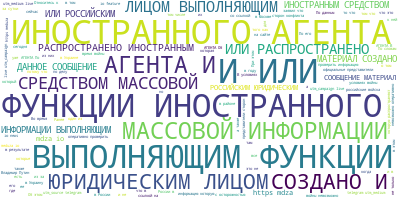

In [8]:
# ITERATED WORD CLOUD FOR EXCLUDING IRRELEVANT THE MOST FREQUENT WORDS
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['MessageText'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
# SPECIAL PACKAGES FOR PRELIMINARY ANALYSIS

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [10]:
# PRELIMINARY ANALYSIS

# 1) lowercases letters
papers["text_lower"] = papers["MessageText"].str.lower()



# 2) remove URL

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
papers["text_wourl"] = papers["text_lower"].apply(lambda text: remove_urls(text))




# 3) remove html

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

papers["text_wohtml"] = papers["text_wourl"].apply(lambda text: remove_html(text))




# 4) remove punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

papers["MessageText_wo_punct"] = papers["text_wohtml"].apply(lambda text: remove_punctuation(text))


# 5) excluding stopwords from cloud

from nltk.corpus import stopwords
", ".join(stopwords.words('russian'))
STOPWORDS = set(stopwords.words('russian'))
STOPWORDS = stopwords.words('russian')
STOPWORDS.extend(["иностранного", "изза", "иностранными", "иностранным", "агента", "функции", "выполняющим", "создано", "https", "http", "kommersant", 
                   "reuters", "reuters_russia", "utm_media", "utm_campaign", "telegram",
                  "wwwkommersantru", "vdmstiru", "vedomosti", "mdzaio", "meduzaio", "реитер", "информацию", "данное", "информацию", "сообщение", "массовом",
                  "информации", "материал", "сообщение", "распространено", "млн", "млрд", "объемы", "лицом", "глава",
                  "году", "лет", "live", "также", "это", "сообщил", "агенство", "tco", "nan", "cbonds", "средством", "россииским",
                   "массовои", "рублеи", "ampgs", "ytm", "eff", "года", "сутки", "january", "february", "march", "april", "may",
                  "june", "july", "august", "september", "october", "september", "november", "december", "doc", "которыи", "который", "которую", 
                   "которои", "которые", "которыи", "почему", "человек", "будут", "news", "против", "заявил", "россиискии", "юридическии", "массовыи"])

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

papers["text"] = papers["MessageText_wo_punct"].apply(lambda text: remove_stopwords(text))


# 6) excluding the most frequent and rarest words

from collections import Counter
cnt = Counter()
for text in papers["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)


FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

papers["text"] = papers["text"].apply(lambda text: remove_freqwords(text))

n_rare_words = 100
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

papers["text"] = papers["text"].apply(lambda text: remove_rarewords(text))



# 7) lemmatization

import re
from pymorphy2 import MorphAnalyzer

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()


def lemmatize_words(text):
    text = re.sub(patterns, ' ', text)
    tokens = []
    for token in text.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

papers["text"] = papers["text"].apply(lemmatize_words)



papers = papers.drop(columns=['text_wourl', 
                              'text_wohtml',
                            'MessageText_wo_punct', 
                              'text_wourl',  
                               'text_lower', 'MessageText'], axis=1)

papers.head()

,DatePosted,text
0,2018-06-19 00:40:10,"[мартовский, выборы, полномочие, сергей, кириенко, расширить, версия, один, главный, задача, под..."
1,2018-06-19 09:13:51,"[считаться, средний, класс, зарабатывать, менее, тысяча, рубль, месяц, москва, раз]"
2,2018-06-19 11:06:23,"[навальный, анонсировать, акция, протест, повышение, пенсионный, возраст, москва, петербург, чм]"
3,2018-06-19 11:36:43,"[музей, московский, кремль, устроить, больший, выставка, посвятить, культура, династия, мина, ра..."
4,2018-06-19 11:46:38,"[загранпаспорт, дорогой, пять, тысяча, рубль]"


In [11]:
papers['text'] = papers['text'].astype(str)
papers.head()

,DatePosted,text
0,2018-06-19 00:40:10,"['мартовский', 'выборы', 'полномочие', 'сергей', 'кириенко', 'расширить', 'версия', 'один', 'гла..."
1,2018-06-19 09:13:51,"['считаться', 'средний', 'класс', 'зарабатывать', 'менее', 'тысяча', 'рубль', 'месяц', 'москва',..."
2,2018-06-19 11:06:23,"['навальный', 'анонсировать', 'акция', 'протест', 'повышение', 'пенсионный', 'возраст', 'москва'..."
3,2018-06-19 11:36:43,"['музей', 'московский', 'кремль', 'устроить', 'больший', 'выставка', 'посвятить', 'культура', 'д..."
4,2018-06-19 11:46:38,"['загранпаспорт', 'дорогой', 'пять', 'тысяча', 'рубль']"


In [12]:
# LDA MODELLING 1) technical steps for output


#process messages
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') 
                 for text in papers['text']]

#getting Original Messages
original_papers = [title for title in papers['text']]


#getting  Dataset Statistics
little_mallet_wrapper.print_dataset_stats(training_data)

#choose topic modelling
num_topics = 10


#changing output directory
output_directory_path = 'topic-model-output/Meduza'
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)
path_to_training_data = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

Number of Documents: 61593
Mean Number of Words per Document: 34.4
Vocabulary Size: 71116


In [13]:
#LDA MODELLING 2) output topics

little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")
    
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

tweet_dict = dict(zip(training_data, original_papers))

def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

Importing data...
Complete
Training topic model...


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 381
total tokens: 2116478
<10> LL/token: -9,69965
<20> LL/token: -9,14892
<30> LL/token: -9,01223
<40> LL/token: -8,95716


Complete
/Users/marina/FIRST/topic-model-output/Meduza/mallet.topic_keys.10
/Users/marina/FIRST/topic-model-output/Meduza/mallet.topic_keys.10
✨Topic 0✨

['российский', 'украинский', 'военный', 'сторона', 'войско', 'проверить', 'район', 'город', 'представитель', 'обстрел', 'удар', 'невозможно', 'оперативно', 'распространять', 'направление', 'конфликт', 'сила', 'всу', 'погибнуть', 'пункт']

✨Topic 1✨

['объявить', 'российский', 'иностранный', 'закон', 'госдума', 'выборы', 'издание', 'организация', 'который', 'депутат', 'путин', 'власть', 'новый', 'сайт', 'сми', 'президент', 'решение', 'владимир', 'принять', 'агентом']

✨Topic 2✨

['подкаст', 'новый', 'ребёнок', 'рассказывать', 'выпуск', 'книга', 'история', 'русский', 'который', 'школа', 'медузы', 'эпизод', 'стать', 'что', 'язык', 'случилось', 'автор', 'первый', 'свой', 'александр']

✨Topic 3✨

['коронавирус', 'случай', 'человек', 'москва', 'новый', 'регион', 'умереть', 'заболеть', 'врач', 'страна', 'больница', 'вакцина', 'none', 'пандем

In [14]:
# SOME RESULTS OF LDA MODELLING TO PRESENT (1) 

from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

display_bolded_topic_words_in_context(topic_number=3, number_of_documents=4)

✨Topic 3✨

['коронавирус', 'случай', 'человек', 'москва', 'новый', 'регион', 'умереть', 'заболеть', 'врач', 'страна', 'больница', 'вакцина', 'none', 'пандемия', 'тысяча', 'день', 'ковид', 'число', 'вакцинация', 'выявить']



✨✨✨

**0.9959175638008194**

['⚡️в', '**ВЫЯВИТЬ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', 'последний', '**ВЫЯВИТЬ**', '**НОВЫЙ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', '**РЕГИОН**', 'иметь', 'клинический', 'проявление', 'болезнь', 'зафиксировать', 'летальный', 'исход', 'полностью', 'выздороветь', '🔸**МОСКВА**', '🔸санктпетербург', '🔸московский', 'область', '🔸самарский', 'область', '🔸воронежский', 'область', '🔸нижегородский', 'область', '🔸свердловский', 'область', '🔸ростовский', 'область', '🔸пермский', 'край', '🔸республика', 'башкортостан', '🔸иркутский', 'область', '🔸челябинский', 'область', '🔸омский', 'область', '🔸ставропольский', 'край', '🔸красноярский', 'край', '🔸оренбургский', 'область', '🔸волгоградский', 'область', '🔸республика', 'крым', '🔸ульяновский', 'область', '🔸саратовский', 'область', '🔸хабаровский', 'край', '🔸архангельский', 'область', '🔸вологодский', 'область', '🔸алтайский', 'край', '🔸пензенский', 'область', '🔸ленинградский', 'область', '🔸удмуртский', 'республика', '🔸тюменский', 'область', '🔸калининградский', 'область', '🔸республика', 'коми', '🔸краснодарский', 'край', '🔸липецкий', 'область', '🔸тверская', 'область', '🔸приморский', 'край', '🔸курский', 'область', '🔸республика', 'саха', 'якутия', '🔸ярославский', 'область', '🔸республика', 'карелия', '🔸брянский', 'область', '🔸забайкальский', 'край', '🔸смоленский', 'область', '🔸белгородский', 'область', '🔸владимирский', 'область', '🔸хантымансийский', 'автономный', 'округ', '🔸кемеровский', 'область', '🔸новосибирский', 'область', '🔸астраханский', 'область', '🔸псковский', 'область', '🔸мурманский', 'область', '🔸севастополь', '🔸ивановский', 'область', '🔸новгородский', 'область', '🔸рязанский', 'область', '🔸кировский', 'область', '🔸орловский', 'область', '🔸курганский', 'область', '🔸амурский', 'область', '🔸республика', 'дагестан', '🔸республика', 'хакасия', '🔸калужский', 'область', '🔸тульский', 'область', '🔸костромской', 'область', '🔸тамбовский', 'область', '🔸ямалоненецкий', 'автономный', 'округ', '🔸республика', 'бурятия', '🔸томский', 'область', '🔸республика', 'чувашия', '🔸республика', 'мордовия', '🔸сахалинский', 'область', '🔸кабардинобалкарский', 'республика', '🔸республика', 'северный', 'осетияалание', '🔸республика', 'калмыкия', '🔸республика', 'ингушетия', '🔸чеченский', 'республика', '🔸республика', 'татарстан', '🔸республика', 'марий', 'эл', '🔸республика', 'тыва', '🔸республика', 'адыгея', '🔸карачаевочеркесский', 'республика', '🔸камчатский', 'край', '🔸еврейский', 'автономный', 'область', '🔸республика', 'алтай', '🔸магаданский', 'область', '🔸ненецкий', 'автономный', 'округ', '🔸чукотский', 'автономный', 'округ', 'сегодняшний', '**ДЕНЬ**', '**ВЫЯВИТЬ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', '**РЕГИОН**', 'весь', 'период', 'зафиксировать', 'летальный', 'исход', 'выздороветь', '**ЧЕЛОВЕК**']

✨✨✨

**0.9959175638008194**

['⚡️в', '**ВЫЯВИТЬ**', '**НОВЫЙ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', 'последний', '**ВЫЯВИТЬ**', '**НОВЫЙ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', '**РЕГИОН**', 'иметь', 'клинический', 'проявление', 'болезнь', 'зафиксировать', 'летальный', 'исход', 'полностью', 'выздороветь', '🔸**МОСКВА**', '🔸санктпетербург', '🔸московский', 'область', '🔸нижегородский', 'область', '🔸свердловский', 'область', '🔸ростовский', 'область', '🔸воронежский', 'область', '🔸республика', 'крым', '🔸красноярский', 'край', '🔸вологодский', 'область', '🔸хабаровский', 'край', '🔸пермский', 'край', '🔸челябинский', 'область', '🔸республика', 'карелия', '🔸самарский', 'область', '🔸архангельский', 'область', '🔸волгоградский', 'область', '🔸иркутский', 'область', '🔸мурманский', 'область', '🔸саратовский', 'область', '🔸омский', 'область', '🔸ульяновский', 'область', '🔸приморский', 'край', '🔸ставропольский', 'край', '🔸кировский', 'область', '🔸пензенский', 'область', '🔸тверская', 'область', '🔸ленинградский', 'область', '🔸забайкальский', 'край', '🔸хантымансийский', 'автономный', 'округ', '🔸калининградский', 'область', '🔸тульский', 'область', '🔸республика', 'коми', '🔸алтайский', 'край', '🔸краснодарский', 'край', '🔸брянский', 'область', '🔸удмуртский', 'республика', '🔸ярославский', 'область', '🔸псковский', 'область', '🔸новгородский', 'область', '🔸астраханский', 'область', '🔸белгородский', 'область', '🔸орловский', 'область', '🔸курский', 'область', '🔸ивановский', 'область', '🔸оренбургский', 'область', '🔸смоленский', 'область', '🔸тюменский', 'область', '🔸республика', 'башкортостан', '🔸республика', 'саха', 'якутия', '🔸калужский', 'область', '🔸тамбовский', 'область', '🔸владимирский', 'область', '🔸республика', 'дагестан', '🔸республика', 'бурятия', '🔸липецкий', 'область', '🔸новосибирский', 'область', '🔸сахалинский', 'область', '🔸рязанский', 'область', '🔸томский', 'область', '🔸амурский', 'область', '🔸курганский', 'область', '🔸кемеровский', 'область', '🔸республика', 'хакасия', '🔸ямалоненецкий', 'автономный', 'округ', '🔸республика', 'чувашия', '🔸кабардинобалкарский', 'республика', '🔸республика', 'татарстан', '🔸севастополь', '🔸республика', 'калмыкия', '🔸костромской', 'область', '🔸республика', 'северный', 'осетияалание', '🔸республика', 'мордовия', '🔸республика', 'алтай', '🔸карачаевочеркесский', 'республика', '🔸камчатский', 'край', '🔸чеченский', 'республика', '🔸республика', 'адыгея', '🔸республика', 'ингушетия', '🔸республика', 'марий', 'эл', '🔸магаданский', 'область', '🔸республика', 'тыва', '🔸еврейский', 'автономный', 'область', '🔸ненецкий', 'автономный', 'округ', '🔸чукотский', 'автономный', 'округ', 'сегодняшний', '**ДЕНЬ**', '**ВЫЯВИТЬ**', '**СЛУЧАЙ**', '**КОРОНАВИРУС**', '**РЕГИОН**', 'весь', 'период', 'зафиксировать', 'летальный', 'исход', 'выздороветь']

✨✨✨

**0.988468727633643**

['распределение', '**НОВЫЙ**', '**ВЫЯВИТЬ**', '**СЛУЧАЙ**', '**РЕГИОН**', '**МОСКВА**', '–', '**СЛУЧАЙ**', 'московский', 'область', '–', '**СЛУЧАЙ**', 'свердловский', 'область', '–', '**СЛУЧАЙ**', 'тульский', 'область', '–', '**СЛУЧАЙ**', 'красноярский', 'край', '–', '**СЛУЧАЙ**', 'хабаровский', 'край', '–', '**СЛУЧАЙ**', 'тамбовский', 'область', '–', '**СЛУЧАЙ**', 'воронежский', 'область', '–', '**СЛУЧАЙ**', 'краснодарский', 'край', '–', '**СЛУЧАЙ**', 'кировский', 'область', '–', '**СЛУЧАЙ**', 'ивановский', 'область', '–', '**СЛУЧАЙ**', 'рязанский', 'область', '–', '**СЛУЧАЙ**', 'мурманский', 'область', '–', '**СЛУЧАЙ**', 'нижегородский', 'область', '–', '**СЛУЧАЙ**', 'пермский', 'край', '–', '**СЛУЧАЙ**', 'новосибирский', 'область', '–', '**СЛУЧАЙ**', 'республика', 'саха', 'якутия', '–', '**СЛУЧАЙ**', 'оренбургский', 'область', '–', '**СЛУЧАЙ**', 'хантымансийский', 'ао', '–', '**СЛУЧАЙ**', 'санктпетербург', '–', '**СЛУЧАЙ**', 'республика', 'чувашия', '–', '**СЛУЧАЙ**', 'саратовский', 'область', '–', '**СЛУЧАЙ**', 'тверская', 'область', '–', '**СЛУЧАЙ**']

✨✨✨

**0.986844413176635**

['**НОВЫЙ**', 'заражение', '**МОСКВА**', 'коми', 'петербург', 'московский', 'область', 'саратовский', 'область', 'вологодский', 'область', 'челябинский', 'область', 'ленинградский', 'область', 'бурятия', 'красноярский', 'край', 'тульский', 'область', 'краснодарский', 'край', 'воронежский', 'область', 'волгоградский', 'область', 'пензенский', 'область', 'омский', 'область', 'курский', 'область', 'тамбовский', 'область', 'хантымансийский', 'округ', 'брянский', 'область', 'ивановский', 'область', 'дагестан', 'кабардинобалкария', 'северный', 'осетия', 'владимирский', 'область', 'липецкий', 'область', 'тверская', 'область', 'чечня', 'башкирия', 'мордовия', 'алтайский', 'край', 'новосибирский', 'область', 'приморский', 'край', 'хабаровский', 'край', 'сахалинский', 'область']

In [16]:
# CREATING TIME SERIES FROM MESSAGES (1)
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)
papers['topic_distributions'] = pd.Series(topic_distributions)
topic_distributions_df = papers['topic_distributions'].apply(pd.Series)
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]
papers = pd.concat([papers, topic_distributions_df], axis=1)


In [17]:
# CREATING TIME SERIES FROM MESSAGES (2)
papers['DatePosted'] = pd.to_datetime(papers['DatePosted'])
papers['year'] = pd.to_datetime(papers['DatePosted'].dt.year, format='%Y')
papers['year-month'] = papers['DatePosted'].dt.to_period('M')
papers['Date (by month)'] = [month.to_timestamp() for month in papers['year-month']]
papers = papers.set_index('Date (by month)')
papers.head()

,DatePosted,text,topic_distributions,российский украинский военный сторона,объявить российский иностранный закон,подкаст новый ребёнок рассказывать,коронавирус случай человек москва,украина президент страна россия,компания российский рубль миллион,человек погибнуть город акция,дело суд навальный задержать,фильм новый режиссёр песня,наш человек свой говорить,year,year-month
Date (by month),,,,,,,,,,,,,,,
2018-06-01,2018-06-19 00:40:10,"['мартовский', 'выборы', 'полномочие', 'сергей', 'кириенко', 'расширить', 'версия', 'один', 'гла...","[0.0022455490828658642, 0.5227619289255939, 0.0018930887192130186, 0.001797012834108669, 0.31500...",0.002246,0.522762,0.001893,0.001797,0.315003,0.002839,0.004022,0.003482,0.036400,0.109556,2018-01-01,2018-06
2018-06-01,2018-06-19 09:13:51,"['считаться', 'средний', 'класс', 'зарабатывать', 'менее', 'тысяча', 'рубль', 'месяц', 'москва',...","[0.005956361192135623, 0.009536839764629487, 0.005021453446031717, 0.37199301366943655, 0.009291...",0.005956,0.009537,0.005021,0.371993,0.009291,0.558370,0.010670,0.009236,0.004746,0.015180,2018-01-01,2018-06
2018-06-01,2018-06-19 11:06:23,"['навальный', 'анонсировать', 'акция', 'протест', 'повышение', 'пенсионный', 'возраст', 'москва'...","[0.006558472234628764, 0.010500890860179699, 0.005529057412898757, 0.005248452980921663, 0.01023...",0.006558,0.010501,0.005529,0.005248,0.010231,0.210466,0.618271,0.111256,0.005226,0.016714,2018-01-01,2018-06
2018-06-01,2018-06-19 11:36:43,"['музей', 'московский', 'кремль', 'устроить', 'больший', 'выставка', 'посвятить', 'культура', 'д...","[0.0038407332215595097, 0.006149468800022401, 0.6544158785412144, 0.003073567593865081, 0.005991...",0.003841,0.006149,0.654416,0.003074,0.005991,0.064054,0.006880,0.005955,0.003060,0.246580,2018-01-01,2018-06
2018-06-01,2018-06-19 11:46:38,"['загранпаспорт', 'дорогой', 'пять', 'тысяча', 'рубль']","[0.011010581491622732, 0.017629245106835386, 0.00928236562398567, 0.008811277563433839, 0.017175...",0.011011,0.017629,0.009282,0.008811,0.017176,0.862461,0.019723,0.017073,0.008773,0.028060,2018-01-01,2018-06


In [18]:
# DESIGN OUTPUT
papers = papers.drop(columns=['DatePosted', 'year', 'year-month'])
papers.head()

,text,topic_distributions,российский украинский военный сторона,объявить российский иностранный закон,подкаст новый ребёнок рассказывать,коронавирус случай человек москва,украина президент страна россия,компания российский рубль миллион,человек погибнуть город акция,дело суд навальный задержать,фильм новый режиссёр песня,наш человек свой говорить
Date (by month),,,,,,,,,,,,
2018-06-01,"['мартовский', 'выборы', 'полномочие', 'сергей', 'кириенко', 'расширить', 'версия', 'один', 'гла...","[0.0022455490828658642, 0.5227619289255939, 0.0018930887192130186, 0.001797012834108669, 0.31500...",0.002246,0.522762,0.001893,0.001797,0.315003,0.002839,0.004022,0.003482,0.036400,0.109556
2018-06-01,"['считаться', 'средний', 'класс', 'зарабатывать', 'менее', 'тысяча', 'рубль', 'месяц', 'москва',...","[0.005956361192135623, 0.009536839764629487, 0.005021453446031717, 0.37199301366943655, 0.009291...",0.005956,0.009537,0.005021,0.371993,0.009291,0.558370,0.010670,0.009236,0.004746,0.015180
2018-06-01,"['навальный', 'анонсировать', 'акция', 'протест', 'повышение', 'пенсионный', 'возраст', 'москва'...","[0.006558472234628764, 0.010500890860179699, 0.005529057412898757, 0.005248452980921663, 0.01023...",0.006558,0.010501,0.005529,0.005248,0.010231,0.210466,0.618271,0.111256,0.005226,0.016714
2018-06-01,"['музей', 'московский', 'кремль', 'устроить', 'больший', 'выставка', 'посвятить', 'культура', 'д...","[0.0038407332215595097, 0.006149468800022401, 0.6544158785412144, 0.003073567593865081, 0.005991...",0.003841,0.006149,0.654416,0.003074,0.005991,0.064054,0.006880,0.005955,0.003060,0.246580
2018-06-01,"['загранпаспорт', 'дорогой', 'пять', 'тысяча', 'рубль']","[0.011010581491622732, 0.017629245106835386, 0.00928236562398567, 0.008811277563433839, 0.017175...",0.011011,0.017629,0.009282,0.008811,0.017176,0.862461,0.019723,0.017073,0.008773,0.028060


In [19]:
# INTERPRETATION OF TOPIC
papers.rename(columns = {'российский украинский военный сторона':'Special military operation', 
                         'объявить российский иностранный закон':'Inner policy changes', 
              'подкаст новый ребёнок рассказывать':'Media', 
              'коронавирус случай человек москва':'Coronavirus', 
              'украина президент страна россия':'International Relations',
             'компания российский рубль миллион':'Sanctions',
             'человек погибнуть город акция':'Protests',
             'дело суд навальный задержать':'Navalniy',
             'фильм новый режиссёр песня':'Culture',
            'наш человек свой говорить':'Roskomnadzor'},  
              inplace = True )

In [20]:
# MAKING EXCEL FILE FOR FUTURE PANEL DATA ANALYSIS

writer = pd.ExcelWriter('output_Meduza11.xlsx') 
papers.to_excel(writer) 
writer.save() 
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [ ]:
### for other sources algorithm is the same (additional non-automated stoplist includes extra-words for all sources, 
# it was constructed by word-clouds of all analized sources in separate code), the only thing to change is 19: for 
# interpretation